<a href="https://colab.research.google.com/github/phanducminh201/Model_training_in_ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# **LOADING DATA**

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

In [ ]:
mask = (y==3) | (y==7)
X = X[mask]
y = y[mask]

In [ ]:
print(y)

[3 3 3 ... 3 7 3]


In [ ]:
np.unique(y)

array([3, 7])

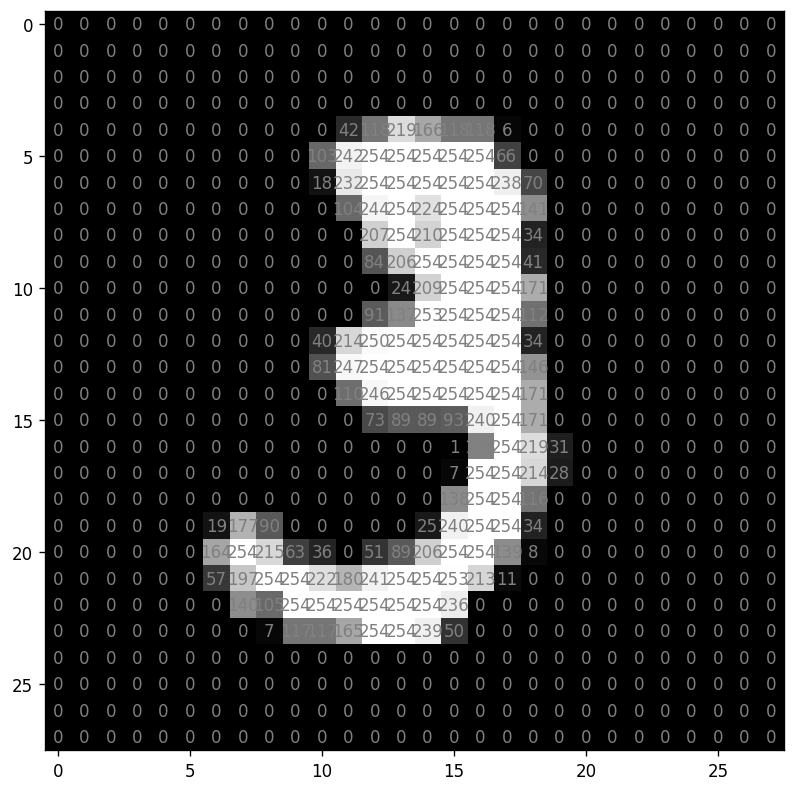

In [ ]:
img1 = X[0].reshape(28,28)
fig, ax = plt.subplots(figsize=(10,8), dpi=120)
ax.imshow(img1, cmap='gray')

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    text = ax.text(j, i, img1[i, j], ha="center", va="center", color="gray")

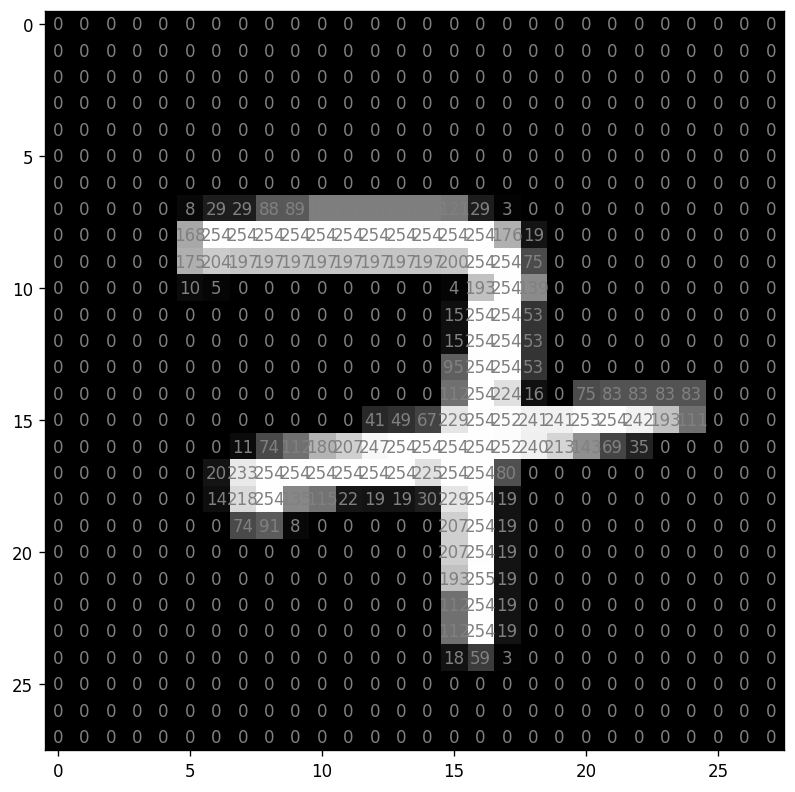

In [ ]:
img2 = X[7].reshape(28,28)
fig, ax = plt.subplots(figsize=(10,8), dpi=120)
ax.imshow(img2, cmap='gray')

for i in range(img2.shape[0]):
  for j in range(img2.shape[1]):
    text = ax.text(j, i, img1[i, j], ha="center", va="center", color="gray")

# **MODEL TRAINING & EVALUATION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
number_predict = model.predict(X_test)
print(number_predict)

[3 7 7 ... 7 3 7]


In [ ]:
cm = confusion_matrix(y_test, number_predict)
cm

array([[1379,   25],
       [  39, 1444]])

In [ ]:
accuracy = accuracy_score(y_test, number_predict)
accuracy

0.9778316591617596

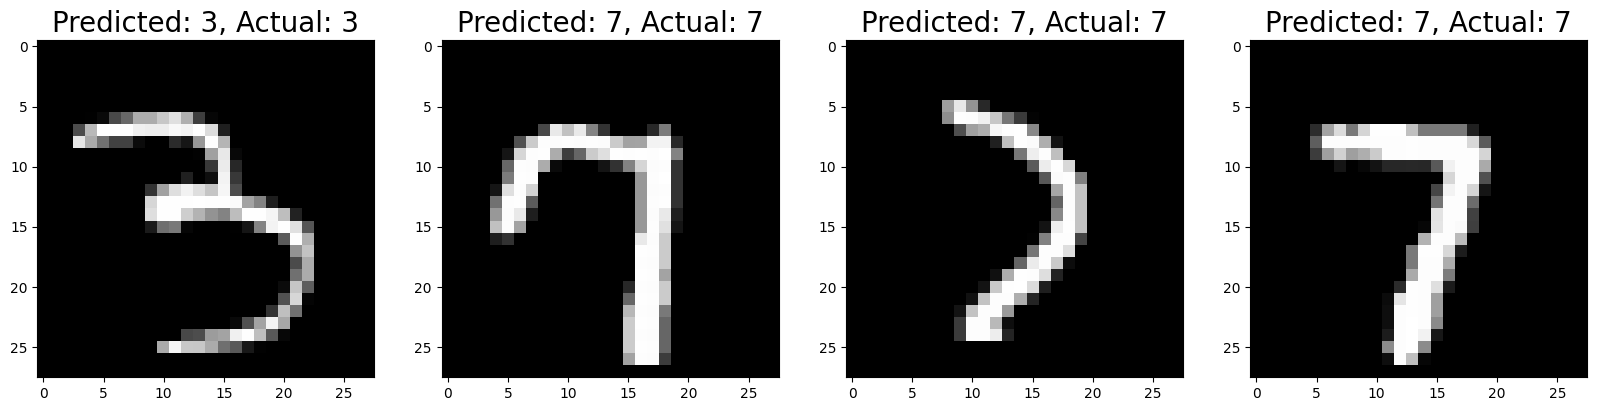

In [ ]:
index = 0
classifiedIndex = []
for predict,actual in zip(number_predict,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,10))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(28,28)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(number_predict[wrong],y_test[wrong]),fontsize=20)

Text(0.5, 1.0, 'Accuracy Score : 0.9778316591617596')

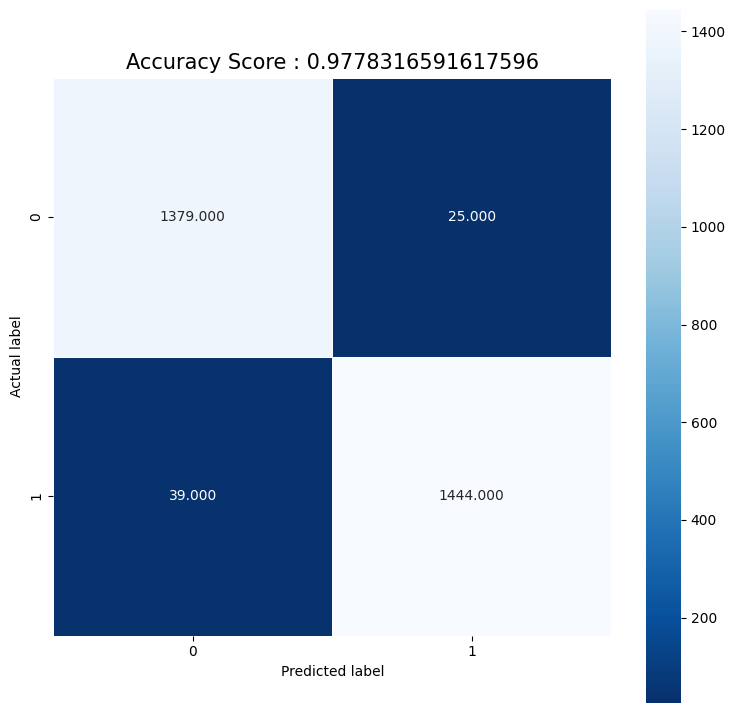

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=0.5,square = True,cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score : {0}'.format(accuracy)
plt.title(all_sample_title,size=15)